In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob

In [4]:
names = np.array([
    "S001_999_096_999",
    "S002_082_081_066",
    "S003_113_112_097",
    "S004_128_141_127",
    "S005_053_052_040",
    "S006_114_113_098",
    "S007_999_067_999",
    "S008_142_999_999",
    "S009_157_156_999",
    "S010_999_041_029",
    "S011_054_999_999",
    "S012_084_083_068",
    "S013_999_143_129",
    "S014_170_180_169",
    "S015_020_030_019",
    "S016_999_999_099",
    "S017_010_009_001",
    "S018_031_999_999",
    "S019_070_999_999",
    "S020_999_999_069",
    "S021_116_115_100",
    "S022_045_144_130",
    "S023_191_190_181",
    "S024_043_055_042",
    "S025_159_171_158",
    "S026_086_999_085",
    "S027_003_011_002",
    "S028_022_032_021",
    "S029_072_071_056",
    "S030_102_117_101",
    "S031_132_146_131",
    "S032_999_999_172",
    "S033_183_192_182",
    "S034_004_012_999",
    "S035_045_999_044",
    "S036_073_087_999",
    "S037_161_173_160",
    "S038_184_193_999",
    "S039_034_033_023",
    "S040_119_118_999",
    "S041_148_147_133",
    "S042_014_999_999",
    "S043_024_999_013",
    "S044_104_103_088",
    "S045_059_058_046",
    "S046_163_999_999",
    "S047_999_999_174",
    "S048_195_194_185",
    "S049_006_015_005",
    "S050_075_074_999",
    "S051_999_134_120",
    "S052_999_163_149",
    "S053_036_047_035",
    "S054_999_105_089",
    "S055_176_175_164",
    "S056_026_025_999",
    "S057_136_135_121",
    "S058_187_196_186",
    "S059_017_016_007",
    "S060_061_076_060",
    "S061_091_090_076",
    "S062_151_165_150",
    "S063_049_048_037",
    "S064_062_999_999",
    "S065_107_122_106",
    "S066_018_999_008",
    "S067_178_177_166",
    "S068_198_197_188",
    "S069_028_038_027",
    "S070_999_063_999",
    "S071_078_092_077",
    "S072_138_137_123",
    "S073_189_999_999",
    "S074_153_999_152",
    "S075_179_999_167",
    "S076_051_050_039",
    "S077_999_093_999",
    "S078_109_124_108",
    "S079_154_999_999",
    "S080_168_999_999",
    "S081_065_079_064",
    "S082_080_999_999",
    "S083_140_155_139",
    "S084_999_999_094",
    "S085_126_999_125",
    "S086_111_110_095",
    "S087_999_999_999",
    "S088_999_999_999",
    "S089_999_999_999",
    "S090_999_999_999",
    "S091_999_999_999",
    "S092_999_999_999",
])

real_x = np.array(
    [ -0.005, -10.47 ,  10.445,  27.903, -31.401,  10.445, -20.935,
        34.881,  41.855, -45.353, -24.423, -10.47 ,  31.39 ,  59.309,
       -55.818,   6.972, -73.262, -52.33 , -17.444, -10.456,  10.46 ,
        31.395,  73.25 , -34.888,  48.832,  -3.493, -76.759, -55.818,
       -20.904,   6.975,  27.903,  62.795,  69.762, -76.748, -34.888,
       -13.958,  48.833,  69.774, -52.333,  10.445,  31.369, -69.77 ,
       -62.795,  -0.006, -31.399,  45.346,  59.298,  73.245, -76.749,
       -20.955,  20.904,  41.844, -45.353,  -3.493,  52.32 , -62.805,
        20.924,  69.763, -73.262, -24.423, -10.465,  38.379, -41.866,
       -27.906,   6.972, -73.262,  52.344,  73.245, -55.819, -34.874,
       -13.958,  20.924,  62.795,  38.379,  52.32 , -41.856, -13.958,
         6.971,  34.881,  41.855, -24.423, -20.956,  27.903,  -3.492,
        17.45 ,  -0.006, -19.279, -80.417, -61.138,  22.809,  80.416,
        57.658], dtype=np.float64)

real_y = np.array(
    [ 11.729,  17.774,  17.769,  23.815,  29.857,  29.869,  35.899,
        36.394,  35.899,  41.941,  41.941,  41.939,  41.939,  41.91 ,
        47.983,  47.983,  54.025,  54.024,  54.52 ,  54.019,  54.025,
        54.019,  54.024,  60.067,  60.067,  66.109,  72.212,  72.151,
        72.111,  72.149,  72.151,  72.169,  72.15 ,  84.235,  84.235,
        84.235,  84.235,  84.226,  90.279,  90.269,  90.297,  96.814,
        96.319,  96.319, 102.359, 102.856, 102.361, 102.369, 108.403,
       108.407, 108.382, 108.419, 114.445, 114.445, 114.444, 120.469,
       120.487, 120.487, 126.529, 126.529, 126.543, 126.517, 132.571,
       133.066, 132.571, 138.613, 138.619, 138.619, 144.655, 144.628,
       144.655, 144.655, 144.669, 150.673, 150.697, 156.719, 156.739,
       156.739, 157.234, 156.739, 162.781, 168.819, 168.823, 174.865,
       174.854, 180.919,  14.605,  76.2  , 153.873, 176.047, 120.498,
        36.728], dtype=np.float64)

In [5]:
def pre_process(image, /, filename='../outs/Lines/ProcessedImage.png'):
    if not filename.endswith('.png') and not filename.endswith('.jpg') and not filename.endswith('.jpeg'):
        return
    result_img = image.copy()
    result_img[np.where((result_img[:, :, 0] == 0) & (result_img[:, :, 1] == 0) & (result_img[:, :, 2] == 0))] = [255, 255, 255]

    # smoothing the colors by blurring the image
    result_img = cv2.bilateralFilter(result_img, d=9, sigmaColor=80, sigmaSpace=90)

    # converting the image blacks to white, and darkening rest of the image
    zeroes = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    ones = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8) + 255

    result_img = np.where((result_img[:, :, 0] <= 60) & (result_img[:, :, 1] <= 51) & (result_img[:, :, 2] <= 65), ones, zeroes)
    
    kernel = np.ones((5, 5), dtype=np.uint8)
    result_img = cv2.erode(result_img, kernel=kernel, iterations=1)

    result_img = cv2.bitwise_not(result_img)
    # cv2.imwrite("TempProcessed.png", result_img)

    result_img = cv2.Canny(result_img, 200, 250, apertureSize=3, L2gradient=True)
    # cv2.imwrite("../temp/TempProcessed2.png", result_img)

    # dilating for better lines
    kernel = np.ones((3, 2), dtype=np.uint8)
    result_img = cv2.dilate(result_img, kernel=kernel, iterations=1)

    if filename.endswith('png') or filename.endswith('jpg') or filename.endswith('jpeg'):
        cv2.imwrite(filename, result_img)

    return result_img

In [6]:
def focus_board(image, DPI, /, threshold=50, chips=[100, 50], filename='../outs/CropImage/Result.jpg'):
    if not filename.endswith('.png') and not filename.endswith('.jpg') and not filename.endswith('.jpeg'):
        return

    factor = int(DPI // 600)
    resized_img = cv2.resize(image, (int(image.shape[1] // factor), int(image.shape[0] // factor)), interpolation=cv2.INTER_AREA)
    result_img = image.copy()
    
    zeroes = np.zeros((resized_img.shape[0], resized_img.shape[1], 3), dtype=np.uint8)
    ones = np.zeros((resized_img.shape[0], resized_img.shape[1], 3), dtype=np.uint8) + 255

    p_zeroes = np.zeros((resized_img.shape[0], resized_img.shape[1]), dtype=np.uint8)
    p_ones = np.zeros((resized_img.shape[0], resized_img.shape[1]), dtype=np.uint8) + 255

    mask = np.where(resized_img[:, :, :] < 80, ones, zeroes)
    mask = cv2.bilateralFilter(mask, d=9, sigmaColor=80, sigmaSpace=125)
    mask = np.where((mask[:, :, 0] == 255) & (mask[:, :, 1] <= 5) & (mask[:, :, 2] == 255), p_ones, p_zeroes)

    rows = np.where(np.count_nonzero(mask, 1) >= threshold)[0]
    cols = np.where(np.count_nonzero(mask, 0) >= threshold)[0]

    result_img = result_img[rows[0] * factor + chips[0] : rows[-1] * factor - chips[0], 
                            cols[0] * factor + chips[1] : cols[-1] * factor - chips[1]]

    cv2.imwrite(filename, result_img)

    return result_img

In [7]:
def rotate_image(image, DPI):
    factor = int(DPI // 600)
    resized_img = cv2.resize(image, (int(image.shape[1] // factor), int(image.shape[0] // factor)), interpolation=cv2.INTER_AREA)

    # We know image is 600DPI after resizing, thus getting the window in a static way
    window = cv2.cvtColor(resized_img[resized_img.shape[0] - 700 : resized_img.shape[0] - 300, :], cv2.COLOR_BGR2GRAY)

    circles = cv2.HoughCircles(window, cv2.HOUGH_GRADIENT, 0.8, minDist=100, param1=11, param2=34, minRadius=22, maxRadius=29)

    holes = np.int64(circles)
    holes = np.flip(holes[0, np.argsort(holes[:, :, 1])[0]], axis=0)

    for hole in holes:
        cv2.circle(window, (hole[0], hole[1]), 22, (255, 255, 255), -1)
    plt.imshow(window)

    if (holes[0][0] < holes[1][0]):
        y2_minus_y1 = holes[0][1] - holes[1][1]
        x2_minus_x1 = holes[0][0] - holes[1][0]
    else:
        y2_minus_y1 = holes[1][1] - holes[0][1]
        x2_minus_x1 = holes[1][0] - holes[0][0]

    if (x2_minus_x1 == 0): return image

    angle = np.round(np.degrees(np.arctan(np.abs(y2_minus_y1 / x2_minus_x1))), 2)
    print(angle)

    # Rotating the image in opposite direction
    rotated_img = image.copy()
    rotation_matrix = cv2.getRotationMatrix2D((0, 0), -angle, 1)
    rotated_img = cv2.warpAffine(rotated_img, rotation_matrix, (rotated_img.shape[1], rotated_img.shape[0]))

    return rotated_img

In [8]:
def populate(line, lineLength):
    rho, theta = line

    a = np.cos(theta)
    b = np.sin(theta)

    x0 = int(round(a * rho))
    y0 = int(round(b * rho))

    # getting coords of second endpoint
    x1 = int(round(x0 + lineLength * (-b)))
    y1 = int(round(y0 + lineLength * (a)))
    x2 = int(round(x0 - lineLength * (-b)))
    y2 = int(round(y0 - lineLength * (a)))

    return np.array([(x1, y1), (x2, y2)], dtype=np.int64)

In [9]:
def dist(point1, point2):
    (x1, y1), (x2, y2) = point1, point2
    return np.sqrt(np.power(x2 - x1, 2) + np.power(y2 - y1, 2))

In [10]:
def slope(points):
    return np.inf if (points[1][0] - points[0][0]) == 0 else (points[1][1] - points[0][1]) / (points[1][0] - points[0][0])

In [11]:
def point_of_intersection(line1, line2):
    x1, y1, x2, y2 = line1[0, 0], line1[0, 1], line1[1, 0], line1[1, 1]
    x3, y3, x4, y4 = line2[0, 0], line2[0, 1], line2[1, 0], line2[1, 1]

    # Solve the system of equations to find the intersection point
    det = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if det == 0:
        # Lines are parallel, no intersection
        return None

    x = int(((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / det)
    y = int(((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / det)

    return x, y
        

In [12]:
def merge(lines):
    l_list = []
    h_list = []

    index, inn_index = 0, len(lines) - 1
    while index < inn_index:
        change = False
        if len(l_list) == 0 or abs(l_list[0][0] - lines[index][0]) < 10:
            l_list.append(lines[index])
            index += 1
            change = True
        if len(h_list) == 0 or abs(h_list[0][0] - lines[inn_index][0]) < 10:
            h_list.append(lines[inn_index])
            inn_index -= 1
            change = True
        if not change: break

    return l_list[0], h_list[0]

In [13]:
def get_lines(image, /, lineLength=1000, threshold=215, slopeParam=(-60, 60)):    
    gray_img = image.copy()

    # Defining rho and theta parameters:
    rho = 0.9
    theta = np.pi / 180 * 1.3

    # for hexagon, we require lines at angle of 60°, 0° or -60°.
    # note, hough lines are based Hesse Normal Form, thus the actual line is perpendicular to the line formed by rho and theta.
    # Thus, vertical is 0° and horizontal is 90°.
    min_theta = slopeParam[0] * np.pi / 180
    max_theta = slopeParam[1] * np.pi / 180

    lines = cv2.HoughLines(gray_img, rho, theta, threshold, min_theta=min_theta, max_theta=max_theta)

    # filtering lines with theta as 60, -60 and 90 into respective np.ndarrays
    lines_60 = lines[np.round(np.degrees(lines[:, :, 1])) == 60]
    lines_n60 = lines[np.round(np.degrees(lines[:, :, 1])) == -60]
    lines_90 = lines[np.round(np.degrees(lines[:, :, 1])) == 0]

    # Sorting the columns in the arrays. Since the theta for all lines are same in an array, the pair of rho and theta is maintained.
    lines_60.sort(axis=0)
    lines_n60.sort(axis=0)
    lines_90.sort(axis=0)

    # Getting the final edges for the hexagon
    lines_60 = merge(lines_60)
    lines_n60 = merge(lines_n60)
    lines_90 = merge(lines_90)
    hex_lines = np.array([populate(lines_60[0], lineLength), populate(lines_60[1], lineLength)
                    , populate(lines_n60[0], lineLength), populate(lines_n60[1], lineLength)
                    , populate(lines_90[0], lineLength), populate(lines_90[1], lineLength)])
    
    for line in hex_lines:
        x1, y1 = line[0]
        x2, y2 = line[1]
        success, (x1, y1), (x2, y2) = cv2.clipLine((0, 0, image.shape[1], image.shape[0]), (x1, y1), (x2, y2))
        if success:
            line[0] = (x1, y1)
            line[1] = (x2, y2)
    
    return hex_lines

In [14]:
def clip_to_intersection(image, lineset):
    vertices = []

    for index in range(len(lineset)):
        for inn_index in range(index + 1, len(lineset)):
            vertex = point_of_intersection(lineset[index], lineset[inn_index])
            if vertex != None and 0 < vertex[0] < image.shape[1] and 0 < vertex[1] < image.shape[0]:
                if dist(lineset[index][0], vertex) <= dist(lineset[index][1], vertex): lineset[index][0] = vertex 
                else: lineset[index][1] = vertex

                if dist(lineset[inn_index][0], vertex) <= dist(lineset[inn_index][1], vertex): lineset[inn_index][0] = vertex 
                else: lineset[inn_index][1] = vertex

                vertices.append(vertex)
    
    return vertices

In [15]:
def get_holes(ref_point, DPI):
    # getting pixel-based coords from real coords
    real_coords = np.array((real_x, real_y)).T
    real_converted = np.int64(real_coords * DPI // 25.4)

    # applying translations
    real_pix_x = real_converted[:, 0] + ref_point[0]
    real_pix_y = np.abs(ref_point[1] - real_converted[:, 1])
    coords_real_pix = np.array((real_pix_x, real_pix_y, names)).T

    return coords_real_pix

In [16]:
def annotate(image, DPI, /, lines=None, vertices=None, holes=None, color1=(0, 0, 255), color2=(255, 255, 0), color3=(255, 255, 255), thickness1=3, thickness2=10, thickness3=7, radius = 4, fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=1, filename="../outs/Final_Main_Lines.png"):
    if not filename.endswith('.png') and not filename.endswith('.jpg') and not filename.endswith('.jpeg'):
        return
    
    result_img = image.copy()

    if lines is not None:
        for line in lines:
            cv2.line(result_img, line[0], line[1], color1, thickness1)

    if vertices is not None:
        for vertex in vertices:
            cv2.line(result_img, (vertex[0], vertex[1]), (vertex[0] + 1, vertex[1]), color2, thickness2)

    if holes is not None:
        for hole in holes:
            cv2.putText(result_img, str(hole[2].split('_')[0]), (int(hole[0]), int(hole[1])), fontFace, fontScale * (DPI // 600), color3, thickness1 * (DPI // 600))
            cv2.circle(result_img, (int(hole[0]), int(hole[1])), radius * (DPI // 600), color2, thickness3 * (DPI // 600))
    
    cv2.imwrite(filename, result_img)
    
    return result_img

In [17]:
def annotate_lines(image, lines, /, color=(0, 0, 255), thickness=3, filename="../outs/Detection_Main_Lines.png"):
    if not filename.endswith('.png') and not filename.endswith('.jpg') and not filename.endswith('.jpeg'):
        return 
    
    result_img = image.copy()

    for line in lines:
        cv2.line(result_img, line[0], line[1], color, thickness)
            
    cv2.imwrite(filename, result_img)

    return result_img

In [18]:
def annotate_holes(image, holes, DPI, /, color1=(255, 255, 255), color2=(255, 255, 0), thickness1=3, radius=4, thickness2=-1, fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=1, filename="../outs/All_Names_vL.png"):
    if not filename.endswith('.png') and not filename.endswith('.jpg') and not filename.endswith('.jpeg'):
        return

    result_img = image.copy()
    
    for hole in holes:
        cv2.putText(result_img, str(hole[2].split('_')[0]), (int(hole[0]), int(hole[1])), fontFace, fontScale * (DPI // 600), color1, thickness1 * (DPI // 600))
        cv2.circle(result_img, (int(hole[0]), int(hole[1])), radius * (DPI // 600), color2, thickness2 * (DPI // 600))

    cv2.imwrite(filename, result_img)
    return result_img

In [19]:
def annotate_points(image, vertices, /, color=(0, 0, 255), thickness=3, filename="../outs/Vertices_Main_Lines.png"):
    if not filename.endswith('.png') and not filename.endswith('.jpg') and not filename.endswith('.jpeg'):
        return 
    
    result_img = image.copy()

    for vertex in vertices:
        cv2.line(result_img, (vertex[0], vertex[1]), (vertex[0] + 1, vertex[1]), color, thickness)
        
    cv2.imwrite(filename, result_img)
    
    return result_img

In [1]:
def extract(image, holes, image_DPI, /, path="../outs/Conventionally_named_holes/", offset=(100, 100)):
    if type(offset) != type(()):
        print("Offset must be specified as a tuple")
        return
    
    factor = image_DPI // 600
    offset = np.array(offset)
    x_offset, y_offset = offset * factor

    try:
        num = 0
        strip = None
        for hole in holes:
            # print(int(hole[1]) - x_offset, int(hole[1]) + x_offset, int(hole[0]) - y_offset, int(hole[0]) + y_offset)
            cropped_hole = image[int(hole[1]) - x_offset : int(hole[1]) + x_offset, int(hole[0]) - y_offset : int(hole[0]) + y_offset]
            if strip is None:
                strip = np.ones((100, cropped_hole.shape[1], 3)) * 255
            final_img = np.vstack((cropped_hole, strip.astype('uint8')))
            rgb_img = cv2.cvtColor(cropped_hole, cv2.COLOR_BGR2RGB)
            pil_img = Image.fromarray(rgb_img)
            cv2.putText(final_img, f"{hole[2]}.jpg", (25, final_img.shape[0] - 45), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0, 0), thickness=2)
            pil_img.save(f"{path + hole[2]}.jpg", dpi=(image_DPI, image_DPI))
            num += 1
    except:
        return False
    return True

In [20]:
# Suppressing scientific notations for printing floating point values
np.set_printoptions(suppress=True)

# Reading the image
FILENAME = '../resources/600 DPI -PCB007.jpg'
Image.MAX_IMAGE_PIXELS = None
img = Image.open(fp=FILENAME, mode="r")
DPI = img.info['dpi'][0]
img = np.array(img)

# converting rgb to bgr
img = np.flip(img, axis=-1)

cropped_img = focus_board(img, DPI)

0.61


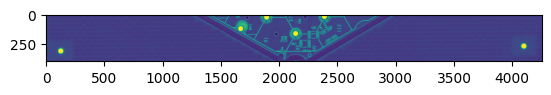

In [21]:
rotated_img = rotate_image(cropped_img, DPI)

processed_img = pre_process(rotated_img)

In [22]:
lines = get_lines(processed_img, lineLength=10000)

_ = annotate_lines(rotated_img, lines, thickness=2)

In [23]:
lines

array([[[   0, 1454],
        [2477,    0]],

       [[1805, 5076],
        [4254, 3639]],

       [[2407, 5076],
        [   0, 3686]],

       [[4254, 1474],
        [1701,    0]],

       [[  83, 5076],
        [  65,    0]],

       [[4117, 5076],
        [4099,    0]]], dtype=int64)

In [24]:
vertices = np.array(clip_to_intersection(rotated_img, lines), dtype=np.int64)

pointy_img = annotate_points(rotated_img, vertices, color=(255, 255, 0), thickness=10)

_ = annotate_lines(pointy_img, lines, thickness=10, filename="../outs/ClippedLines_Main_Lines.png")

In [25]:
lines

array([[[  70, 1412],
        [2092,  225]],

       [[2103, 4900],
        [4112, 3722]],

       [[2103, 4900],
        [  78, 3731]],

       [[4103, 1387],
        [2092,  225]],

       [[  78, 3731],
        [  70, 1412]],

       [[4112, 3722],
        [4103, 1387]]], dtype=int64)

In [26]:
vertices

array([[2092,  225],
       [  70, 1412],
       [2103, 4900],
       [4112, 3722],
       [  78, 3731],
       [4103, 1387]], dtype=int64)

In [27]:
vertices = np.flip(vertices[np.argsort(vertices[:, 1])], axis=0)

holes = get_holes(vertices[0], DPI)

_ = annotate_holes(rotated_img, holes, DPI)

In [28]:
_ = annotate(rotated_img, DPI, lines=lines, vertices=vertices, holes=holes, thickness1=10, thickness2=20, thickness3=10)

In [29]:
extract(rotated_img, holes, DPI)

True

In [30]:
def get_vid(dir, filename="../outs/video.avi"):
    paths = glob.glob(dir)

    if paths is None: return

    images = []
    for im_path in paths:
        img = cv2.imread(im_path)
        images.append(img)

    fourcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(filename, fourcc, 0.5, (images[0].shape[1], images[0].shape[0]), True)

    for img in images:
        out.write(img)
    out.release()

In [31]:
get_vid("e:\\TIFR Project\\combine\\outs\\Conventionally_named_holes\\*.jpg")

In [ ]:
# %timeit extract(rotated_img, holes, DPI)

In [41]:
def timers_function(image, DPI):
    cropped_img = focus_board(image, DPI, chips=(0, 100))
    rotated_img = rotate_image(cropped_img, DPI)
    processed_img = pre_process(rotated_img)

    lines = get_lines(processed_img, lineLength=10000)
    _ = annotate_lines(rotated_img, lines, thickness=12)

    vertices = np.array(clip_to_intersection(rotated_img, lines), dtype=np.int64)
    pointy_img = annotate_points(rotated_img, vertices, color=(255, 255, 0), thickness=30)
    _ = annotate_lines(pointy_img, lines, filename="../outs/Lines/ClippedLines_Main_Lines.png")

    vertices = np.flip(vertices[np.argsort(vertices[:, 1])], axis=0)
    holes = get_holes(vertices[0], DPI)
    _ = annotate_holes(rotated_img, holes, DPI)

    _ = annotate(rotated_img, DPI, lines=lines, vertices=vertices, holes=holes, thickness1=10, thickness2=20, thickness3=10)

    extract(rotated_img, holes, DPI)
    get_vid("e:\\TIFR Project\\combine\\outs\\Conventionally_named_holes\\*.jpg")

0.61
0.61
0.61
0.61
0.61
0.61
0.61
0.61
16 s ± 156 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


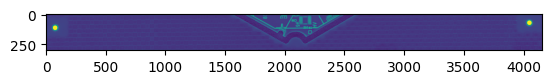

In [42]:
# # Reading the image
# Image.MAX_IMAGE_PIXELS = None
# for FILENAME in ['../resources/600 DPI -PCB007.jpg', '../resources/1200 DPI -PCB008.jpg', '../resources/800 RS -PCB006.jpg']:
#     img = Image.open(fp=FILENAME, mode="r")
#     DPI = img.info['dpi'][0]
#     img = np.array(img)
#     img = np.flip(img, axis=-1)

#     %timeit -c timers_function(img, DPI)